# Naive Bayes

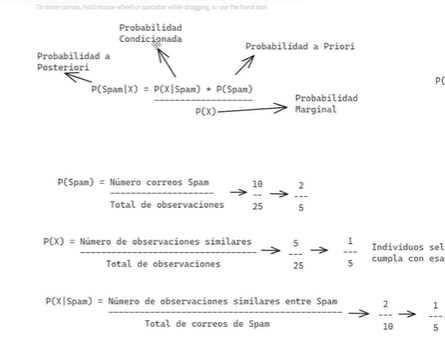

Pasos
- Se consigue el total de correos
- Se consigue 10 correos SPAM
- Se consigue 5 observaciones similares
- Se consigue 2 correos del conjunto de SPAM
El resultado dara un  numero decimal y eso lo transformamos a porcentaje(seria 0.4 que es 40%)
- Hacemos lo mismo pero con lo no SPAM

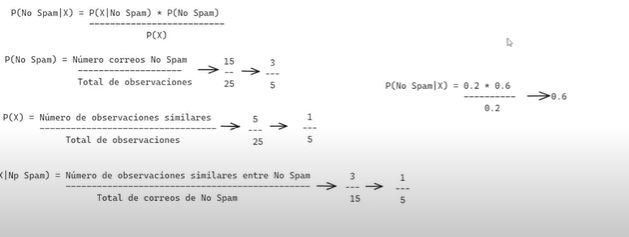

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from colorama import Style, Fore, Back


In [3]:
data = pd.read_csv("Data/Social_Network_Ads.csv")

In [8]:
#
X = data.iloc[:, [2, 3]] # La edad y el salario estimado
y = data.iloc[:, -1].values # La columna Purchased
#* Nos encargamos de la variable categorica Gender
gender = data[["Gender"]]

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(gender)

print(ic(cat_encoder.categories_))
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out()) # Explicacion: El resultado de la codificacion one hot es una matriz dispersa, por lo que tenemos que convertirla a un dataframe para poder visualizarla.
#* La matriz dispersa es una matriz que contiene muchos ceros, por lo que se almacena de forma eficiente en memoria.
encoded_df.head(3)

data_1 = pd.concat([X, encoded_df], axis=1) # Concatenamos la matriz de edad y salario estimado con la matriz de codificacion one hot.
data_1.head(3)
ic(data_1.shape)

#
#* Separamos los datos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size=0.2, random_state=0) # Explicacion: Separamos los datos en train y test, el 80% de los datos se usan para entrenar el modelo y el 20% para probarlo.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # Explicacion: Se crea un objeto de la clase StandardScaler, que se encargara de estandarizar los datos.
X_train = sc_X.fit_transform(X_train) # Explicacion: Se ajusta el objeto StandardScaler a los datos de entrenamiento y se transforma los datos de entrenamiento.
X_test = sc_X.transform(X_test) # Explicacion: Se transforma los datos de prueba con el objeto StandardScaler ya ajustado a los datos de entrenamiento.

from sklearn.naive_bayes import GaussianNB
cls_model = GaussianNB() # Explicacion: Se crea un objeto de la clase GaussianNB, que se encargara de entrenar el modelo Naive Bayes.
cls_model.fit(X_train, y_train) # Explicacion: Se entrena el modelo SVM con los datos de entrenamiento.

y_pred = cls_model.predict(X_test) # Explicacion: Se predicen los resultados de los datos de prueba con el modelo SVM ya entrenado.
ic(y_pred)
ic(y_test)

ic| cat_encoder.categories_: [array(['Female', 'Male'], dtype=object)]
ic| data_1.shape: (400, 4)
ic| y_pred: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                   0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)
ic| y_test: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
                   0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
                   1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
                   0, 0, 0, 0, 1, 

[array(['Female', 'Male'], dtype=object)]


0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred) # Explicacion: Se crea una matriz de confusiones con los datos de prueba y las predicciones del modelo SVM.
ic(cm)
recall = recall_score(y_test, y_pred) # Explicacion: Se calcula el recall del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(recall)
accuracy = accuracy_score(y_test, y_pred) # Explicacion: Se calcula la precision del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(accuracy)
precision = precision_score(y_test, y_pred) # Explicacion: Se calcula la precision del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(precision)
f1 = f1_score(y_test, y_pred) # Explicacion: Se calcula el f1 score del modelo SVM con los datos de prueba y las predicciones del modelo SVM.
ic(f1)

ic| cm: array([[56,  2],
               [ 4, 18]], dtype=int64)
ic| recall: 0.8181818181818182
ic| accuracy: 0.925
ic| precision: 0.9
ic| f1: 0.8571428571428572


0.8571428571428572